In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib notebook


# dependencies to zoom in 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
df = pd.read_csv('Gaia_kepler_stellar_properties_tab2.csv', index_col=0)

In [4]:
df.columns

Index(['Msun', 'logLsun', 'Teff', 'Rsun'], dtype='object')

### Point to make:
Highlight the tendency of stars to follow specifics evolutions pattern on the Luminosity-Temperature diagram..

In [84]:
np.where((df.Teff<4) &(df.Rsun==1))

(array([   226,    464,   2034,   2976,   3382,   5400,   9352,  13813,
         14646,  15341,  17226,  18637,  20016,  20642,  20751,  20842,
         21607,  25832,  26306,  27238,  27974,  28113,  34097,  37106,
         38859,  40289,  41533,  44174,  44580,  44640,  44850,  47355,
         49414,  54642,  56464,  57003,  57567,  58412,  58510,  58566,
         61852,  62151,  63260,  66387,  66607,  67254,  67637,  68340,
         68449,  71584,  71976,  75719,  76282,  78651,  79039,  81648,
         82939,  87769,  88190,  88307,  88701,  90326,  91321,  93983,
         95575,  98548,  99661, 100231, 100260, 101196, 101600, 103242,
        105520, 105716, 107182, 107357, 107902, 109831, 112257, 114622,
        117956, 121934, 124240, 125763, 125912, 126452, 126546, 136720,
        136964, 138680, 139431, 140498, 142594, 144828, 146332, 148597,
        150342, 150558, 151833, 151840, 153857, 153927, 154167, 154616,
        156989, 160588, 161287, 161579, 162267, 163339, 164464, 

<IPython.core.display.Javascript object>


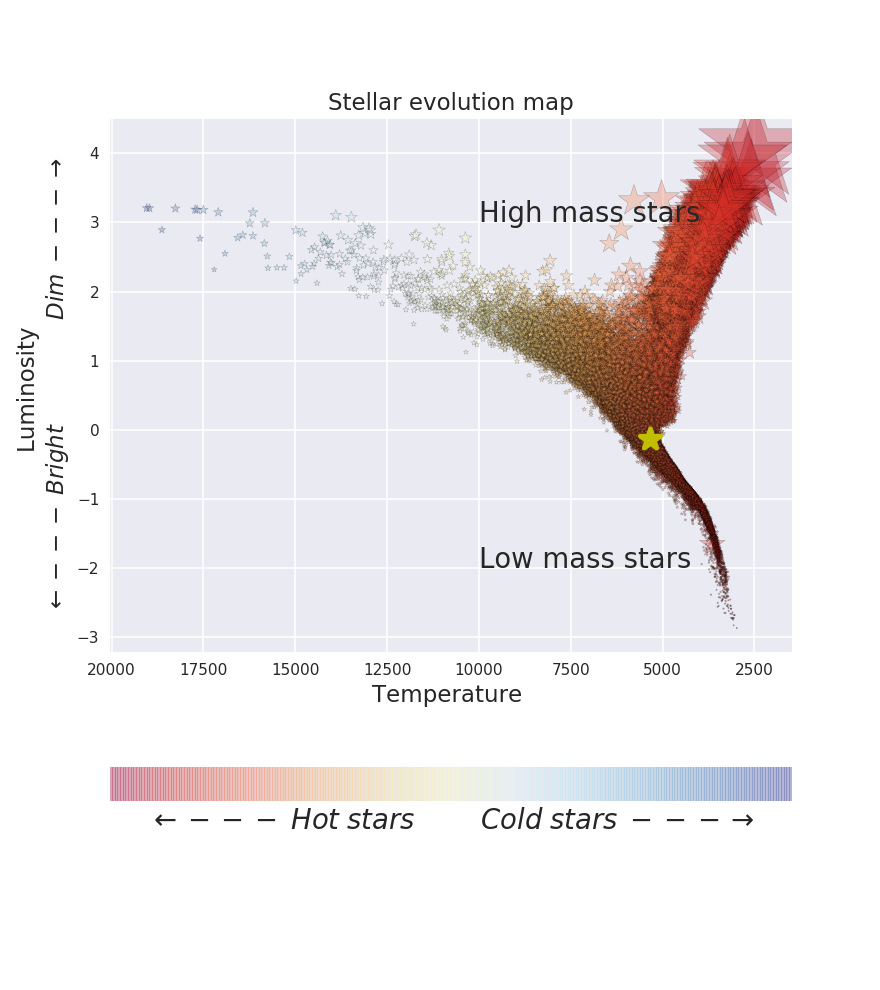

In [124]:
with plt.style.context("seaborn"):
    fig, ax=plt.subplots(1,figsize=(8,9))
    cmap = cm.get_cmap('RdYlBu')
    f=ax.scatter(df.Teff, df.logLsun, marker='*',edgecolors='k', facecolors='none',c=df.Teff, cmap=cmap,s=10*df.Rsun, alpha=0.3)
    ax.scatter(np.array(df['Teff'])[226], np.array(df['logLsun'])[226], marker='*', linewidth=3,facecolors='none',c='y',s=10*, alpha=1)
    ax.set_xlim([df.Teff.max()+1000,df.Teff.min()-1000])
    ax.set_xlabel('Temperature ',fontsize=15)
    ax.set_ylabel('Luminosity \n'+r'$\leftarrow ---\; Bright \;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;\; Dim\; ---\rightarrow $',fontsize=15)
    ax.set_title('Stellar evolution map',fontsize=15)
    # cmap
    cbar=plt.colorbar(f,orientation='horizontal')
    f.set_clim([df.Teff.max()+1000,df.Teff.min()-1000])
    cbar.set_ticks([])
    cbar.ax.set_xlabel(r'$\leftarrow ---\; Hot\; stars \;\;\;\;\;\;\;\;\; Cold\; stars\; ---\rightarrow $', fontsize=18)    
    ax.annotate('High mass stars', (10000,3),fontsize=18)
    ax.annotate('Low mass stars', (10000,-2),fontsize=18)
    #add zoom in
    #axins = zoomed_inset_axes(ax, 2.5, loc=3) # zoom = 6
    #axins.scatter(df.Teff, df.logLsun, marker='*',edgecolors='k', facecolors='none',c=df.Teff, cmap=cmap ,s=80*df.Rsun, alpha=0.3)

    #x1, x2, y1, y2 = 3000, 6000, -2.5, -0.5
    #axins.set_xlim(x2, x1)
    #axins.set_ylim(y1, y2)

    #axins.set_xticks([])
    #axins.set_yticks([])

    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    #mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

  

The plot shows the distribution of stars respect two intrisic parameters: Luminosity (in log10 scale) and Temperature. The temperature axis decreases instead of increasing to follow, from left to right the tipical evolution of a star.

As a star evolve it increase its core mass due to the different products of the nuclear reactions that take place in the stellar core, as a consequence we see it moving on the diagram at higher luminosities because as it increases its mass, the star would need more energy to sustain its gravity. 

As the star push the outer layers to not fall on the core, it can happen that it push them hard enough to expand its radius, this will cause the stellar volume to increase and because as a consequence the stellar pressure will decrease the same will happen to the temperatures. Thus, we would see the star moves at higher luminosity and lower temperature.

### Challenge Problem

In [110]:
from astropy.io import ascii
my_data=ascii.read('mydata.cat')
my_data2=ascii.read('mydata2.fout')

In [108]:
my_data.columns

<TableColumns names=('col1','u','g','r','i','Z','J','H','Ks','u_err','g_err','r_err','i_err','Z_err','J_err','H_err','Ks_err','ra','dec','z_spec','fuv','nuv','fuv_err','nuv_err','IRAC1','IRAC2','IRAC1_err','IRAC2_err','Id_gal')>

In [111]:
my_data2.columns

<TableColumns names=('col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11')>

In [116]:
with plt.style.context("seaborn"):
    fig, ax=plt.subplots(1,figsize=(8,9))
    cmap = cm.get_cmap('RdBu')
    f=ax.scatter(np.log10(-2.5*my_data['g']/my_data['J']),np.log10(-2.5*my_data['u']/my_data['g']), marker='o',edgecolors='k', facecolors='none',c=my_data2['col8'][0:113891], cmap=cmap,s=10*df.Rsun, alpha=0.3)
    plt.legend(loc=2) 
    ax.set_xlim([my_data2['col8'].max()+0.1,my_data2['col8'].min()-0.1])
    ax.set_xlabel('g-J ',fontsize=15)
    ax.set_ylabel('u-g ',fontsize=15)
    ax.set_title('Galaxy',fontsize=15)
    # cmap
    cbar=plt.colorbar(f,orientation='vertical')
    f.set_clim([my_data2['col8'].max()+0.1,my_data2['col8'].min()-0.1])
    cbar.set_ticks([])
    cbar.ax.set_ylabel(r'$$', fontsize=18)    
    ax.annotate('High mass stars', (10000,3),fontsize=18)
    ax.annotate('Low mass stars', (10000,-2),fontsize=18)
    

<IPython.core.display.Javascript object>

/Users/fabioragosta/miniconda2/envs/DSFP/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


ValueError: Axis limits cannot be NaN or Inf